# Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('diabetes (2).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#replace 0 by mean
bmi_mean = df.BMI.mean()
df.BMI = df.BMI.replace(0,bmi_mean)

# Glucose
glucose_mean = df.Glucose.mean()
df.Glucose = df.Glucose.replace(0,glucose_mean)

# Blood Pressure
bp_mean = df.BloodPressure.mean()
df.BloodPressure = df.BloodPressure.replace(0,bp_mean)

# Skin Thickness
skin_mean = df.SkinThickness.mean()
df.SkinThickness = df.SkinThickness.replace(0,skin_mean)

# Insulin
insulin_mean = df.Insulin.mean()
df.Insulin = df.Insulin.replace(0,insulin_mean)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#seperate test groups
# 1 = 'early_20s', 2 = 'late_20s', 3 = '30s', 4 = '40s_to_80s']
df['age_group'] = pd.qcut(df.Age, 4, labels=[1,2,3,4])
# 1 = (-0.001, 1.0], 2 = (1.0, 3.0], 3 = (3.0, 6.0], 4 = (6.0, 17.0]
df['pre_group'] = pd.qcut(df.Pregnancies,4, labels = [1,2,3,4])

# 1 = low, 2 = medium, 3 = high
#(18.198999999999998, 29.3] < (29.3, 34.733] < (34.733, 67.1]
df['bmi_group'] = pd.qcut(df.BMI, 3, labels=[1,2,3])

#(43.999, 105.0] < (105.0, 130.0] < (130.0, 199.0]
df['glu_group'] = pd.qcut(df.Glucose,3, labels = [1,2,3])

#(13.999, 79.799] < (79.799, 94.333] < (94.333, 846.0]
df['ins_group'] = pd.qcut(df.Insulin,3,labels = [1,2,3])

# (23.999, 68.0] < (68.0, 76.0] < (76.0, 122.0]
df['bp_group'] = pd.qcut(df.BloodPressure, 3, labels=[1,2,3])

#(0.077, 0.268] < (0.268, 0.53] < (0.53, 2.42]
df['dpf_group'] = pd.qcut(df.DiabetesPedigreeFunction,3, labels = [1,2,3])

#(6.999, 20.536] < (20.536, 30.0] < (30.0, 99.0]
df['st_group'] = pd.qcut(df.SkinThickness,3, labels = [1,2,3] )

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_group,pre_group,bmi_group,glu_group,ins_group,bp_group,dpf_group,st_group
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,4,3,2,3,1,2,3,3
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,3,1,1,1,1,1,2,2
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,3,4,1,3,1,1,3,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,1,1,1,1,2,1,1,2
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,3,1,3,3,3,1,3,3


# Exploratory Data Analysis

Text(0, 0.5, 'Count of Patients')

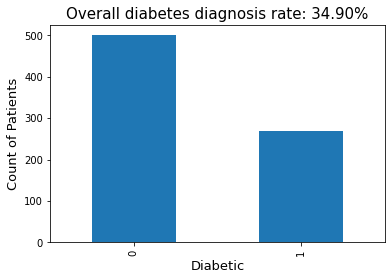

In [ ]:
# sns.countplot(df['Outcome'])  
df.Outcome.value_counts().sort_index().plot.bar()
diabetic_rate = df.Outcome.mean()
plt.title(f"Overall diabetes diagnosis rate: {diabetic_rate:.2%}", size=15)
plt.xlabel('Diabetic', size=13)
plt.ylabel('Count of Patients', size=13)


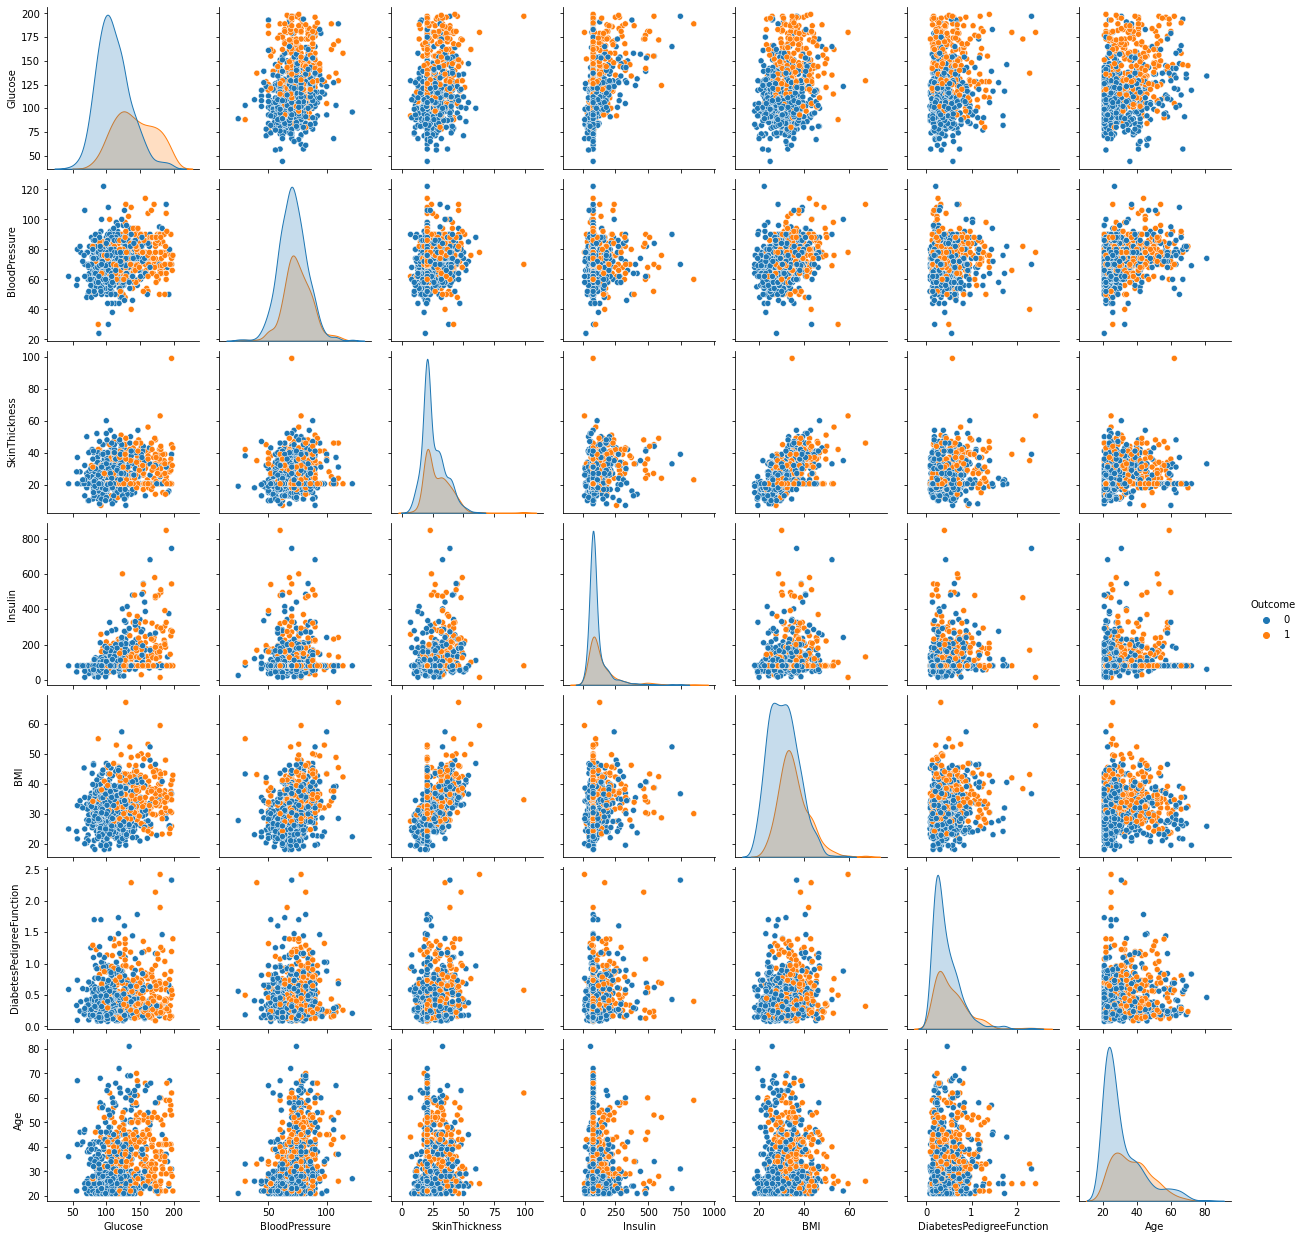

In [ ]:
sns.pairplot(df,hue='Outcome',vars = df.columns[1:8])

In [ ]:
df2 = df[['Pregnancies','Glucose',	'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',	'Age','Outcome']]
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


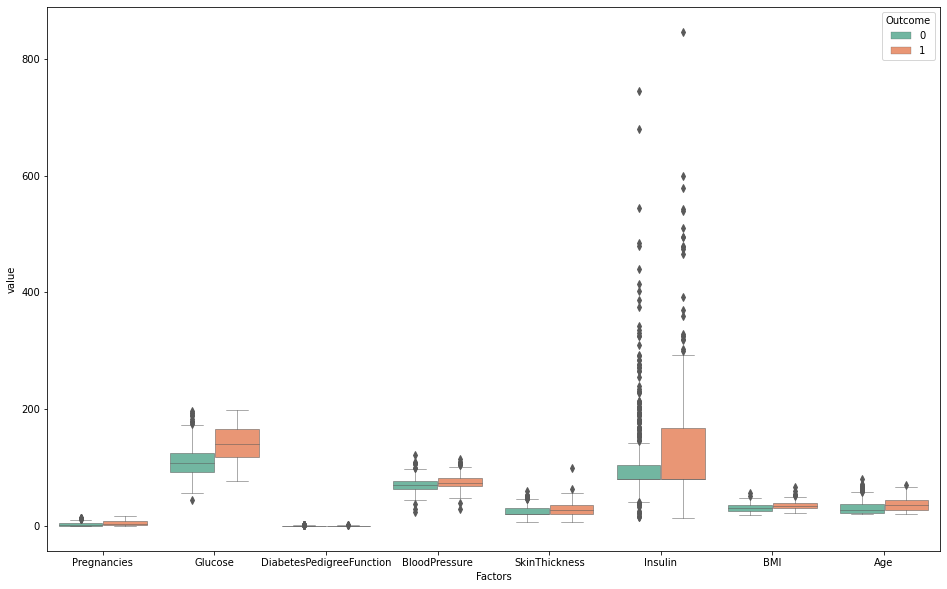

In [ ]:
d_melt = pd.melt(df2, id_vars=['Outcome'], value_vars=['Pregnancies','Glucose','DiabetesPedigreeFunction',	'BloodPressure',
                                                       'SkinThickness','Insulin','BMI','Age'])
d_melt.columns = ['Outcome', 'Factors', 'value']
fig = plt.figure(figsize=(16,10))
sns.boxplot(x="Factors", y="value", hue="Outcome", data=d_melt, palette="Set2",linewidth = 0.5)

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

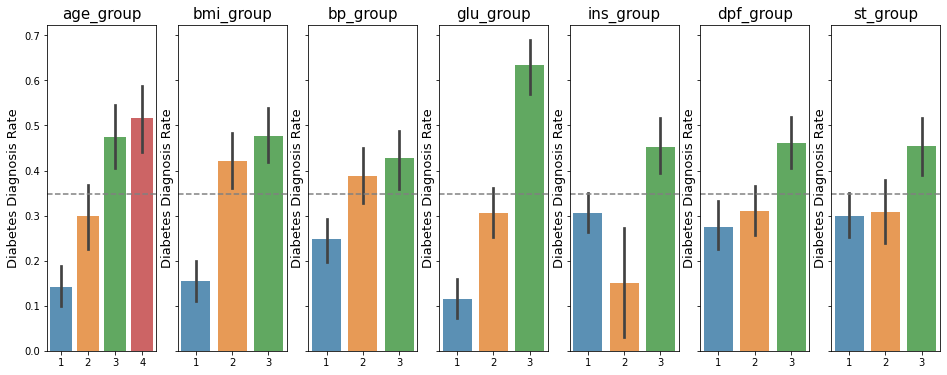

In [ ]:
# visualizing subgroups within feature bins, is there a significant difference of diabetic diagnosis?
# categorical features we can compare
features = ['age_group', 'bmi_group', 'bp_group','glu_group','ins_group','dpf_group','st_group']

# overall diagnosis of diabetes on whole train df
diabetic_rate = df.Outcome.mean()

# plotting subgroups diagnosis rate and comparing to overal with dashed line
_, ax = plt.subplots(nrows=1, ncols=7, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'Outcome', data=df, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Diabetes Diagnosis Rate', size=13)
    ax[i].set_title(feature, size=15)
    ax[i].axhline(diabetic_rate, ls='--', color='grey')

# T-test

Age VS Outcome

H0: There is no significant correlation between age and diabetes diagnosis.

Ha: Older populations correlate with a higher rate of diabetes.

Age average: 33.24 
Age median: 29.0


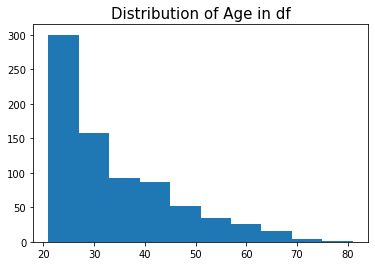

In [ ]:
plt.hist(df.Age)
plt.title('Distribution of Age in df', size=15)
print('Age average:', round(df.Age.mean(),2), '\nAge median:', round(df.Age.median(),2))

In [ ]:
x = df.Age
y = df.Outcome
corr, p = stats.pearsonr(x, y)
print('correlation coeeficient:', corr, '\n\np-value:', p)

correlation coeeficient: 0.2383559830271977 

p-value: 2.209975460664566e-11


DPF VS Outcome

H0: There is no significant correlation between DiabetesPedigreeFunction and diabetes diagnosis.

Ha: Lager DiabetesPedigreeFunction correlate with a higher rate of diabetes.

DPF average: 0.47 
DPF median: 0.37


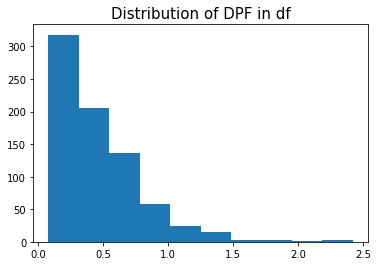

In [ ]:
plt.hist(df.DiabetesPedigreeFunction)
plt.title('Distribution of DPF in df', size=15)
print('DPF average:', round(df.DiabetesPedigreeFunction.mean(),2), '\nDPF median:', round(df.DiabetesPedigreeFunction.median(),2))

In [ ]:
#Correlation test
x = df.DiabetesPedigreeFunction
y = df.Outcome
corr, p = stats.pearsonr(x, y)
print('correlation coeeficient:', corr, '\n\np-value:', p)

correlation coeeficient: 0.17384406565296007 

p-value: 1.254607010148255e-06


BMI VS Outcome

H0: There is no significant correlation between BMI and diabetes diagnosis.

Ha: Higher BMI correlate with a higher rate of diabetes.

BMI average: 32.45 
BMI median: 32.0


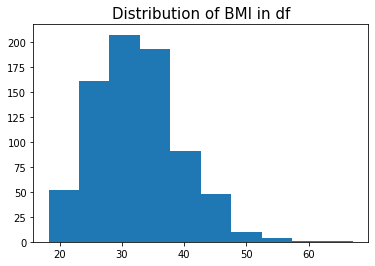

In [ ]:
# BMI is the continuous variable normally distributed?
plt.hist(df.BMI)
plt.title('Distribution of BMI in df', size=15)
print('BMI average:', round(df.BMI.mean(),2), '\nBMI median:', round(df.BMI.median(),2))

In [ ]:
# tesing subgroup of bin 3 of BMI (high BMI group)
top_BMI = df[df.bmi_group == 3]

m = df.Outcome.mean()
xbar = top_BMI.Outcome.mean()
s = top_BMI.Outcome.std()
n = top_BMI.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - m) / (s / sqrt(n))
print('t-value:', round(t,4))
      
p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test
print('p-value:', round(p,4))

t-value: 4.0798
p-value: 0.0001


BP VS Outcome

H0: There is no significant correlation between Blood Pressure and diabetes diagnosis.

Ha: Higher Blood Pressure correlate with a higher rate of diabetes.

Blood Pressure average: 72.25 
Blood Pressure median: 72.0


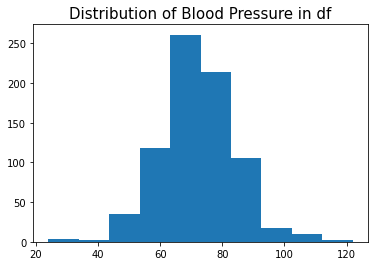

In [ ]:
#Blood Presure is the continuous variable normally distributed?
plt.hist(df.BloodPressure)
plt.title('Distribution of Blood Pressure in df', size=15)
print('Blood Pressure average:', round(df.BloodPressure.mean(),2), '\nBlood Pressure median:', round(df.BloodPressure.median(),2))

In [ ]:
# tesing subgroup of bin 3 of BP
top_BP = df[df.bp_group == 3]

μ = df.Outcome.mean()
xbar = top_BP.Outcome.mean()
s = top_BP.Outcome.std()
n = top_BP.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))
print('t-value:', round(t,4))
      
p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test
print('p-value:', round(p,4))

t-value: 2.5208
p-value: 0.0123


Glucose VS Outcome

H0: There is no significant correlation between Glucose and diabetes diagnosis.

Ha: Higher Glucose correlate with a higher rate of diabetes.

Glucose average: 121.68 
Glucose median: 117.0


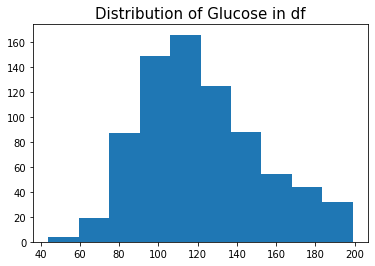

In [ ]:
#Glucose is the continuous variable normally distributed?
plt.hist(df.Glucose)
plt.title('Distribution of Glucose in df', size=15)
print('Glucose average:', round(df.Glucose.mean(),2), '\nGlucose median:', round(df.Glucose.median(),2))

In [ ]:
#Correlation test
x = df.Glucose
y = df.Outcome
corr, p = stats.pearsonr(x, y)
print('correlation coeeficient:', corr, '\n\np-value:', p)

correlation coeeficient: 0.4929084272210893 

p-value: 2.9374175087314776e-48


Insulin VS Outcome

H0: There is no significant correlation between Insulin and diabetes diagnosis.

Ha: Higher Insulin correlate with a higher rate of diabetes.

Insulin average: 118.66 
Insulin median: 79.8


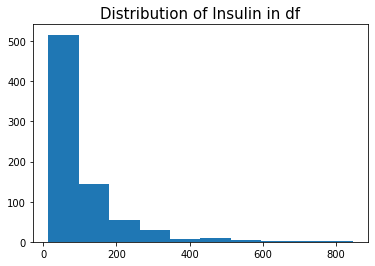

In [ ]:
#Insulin is the continuous variable normally distributed?
plt.hist(df.Insulin)
plt.title('Distribution of Insulin in df', size=15)
print('Insulin average:', round(df.Insulin.mean(),2), '\nInsulin median:', round(df.Insulin.median(),2))

In [ ]:
#Correlation test
x = df.Insulin
y = df.Outcome
corr, p = stats.pearsonr(x, y)
print('correlation coeeficient:', corr, '\n\np-value:', p)

correlation coeeficient: 0.17918526723427555 

p-value: 5.788429897830888e-07


SkinThickness VS Outcome

H0: There is no significant correlation between SkinThickness and diabetes diagnosis.

Ha: Lager SkinThickness correlate with a higher rate of diabetes.

SkinThickness average: 26.61 
SkinThickness median: 23.0


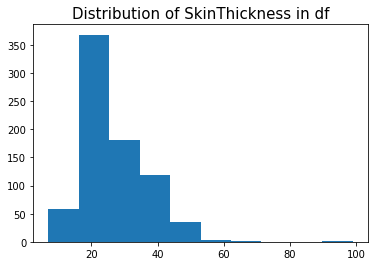

In [ ]:
#SkinThickness is the continuous variable normally distributed?
plt.hist(df.SkinThickness)
plt.title('Distribution of SkinThickness in df', size=15)
print('SkinThickness average:', round(df.SkinThickness.mean(),2), '\nSkinThickness median:', round(df.SkinThickness.median(),2))

In [ ]:
#Correlation test
x = df.SkinThickness
y = df.Outcome
corr, p = stats.pearsonr(x, y)
print('correlation coeeficient:', corr, '\n\np-value:', p)

correlation coeeficient: 0.17502595358209036 

p-value: 1.059351509433881e-06


Pregnancy VS Otcome

H0: There is no significant correlation between Pregnancy and diabetes diagnosis.

Ha: The more child had pregnaned correlate with a higher rate of diabetes.

Pregnancy average: 3.85 
Pregnancy median: 3.0


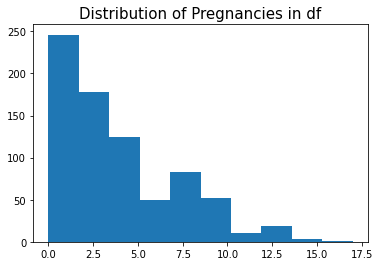

In [ ]:
#Pregnancy is the continuous variable normally distributed?
plt.hist(df.Pregnancies)
plt.title('Distribution of Pregnancies in df', size=15)
print('Pregnancy average:', round(df.Pregnancies.mean(),2), '\nPregnancy median:', round(df.Pregnancies.median(),2))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


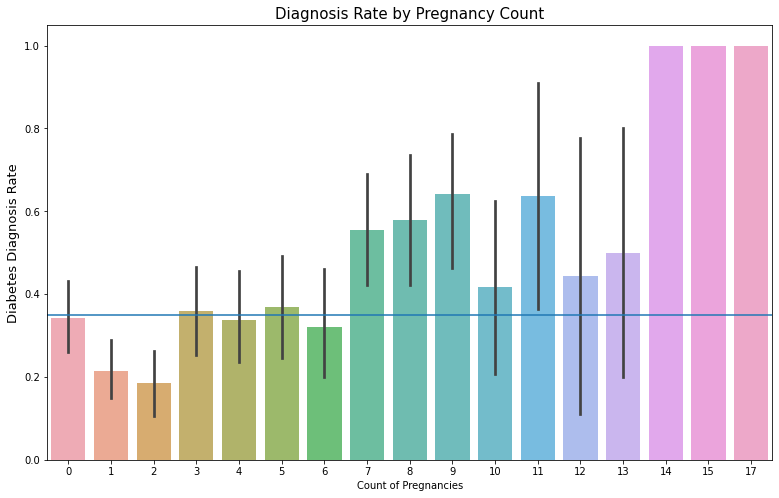

In [ ]:
# overall diagnosis of diabetes on whole df
diabetic_rate = df.Outcome.mean()

plt.figure(figsize=(13,8))

# plotting pregnancy count diagnosis rate and comparing to overall with dashed line
sns.barplot('Pregnancies', 'Outcome', data=df, alpha=.8)
plt.xlabel('Count of Pregnancies')
plt.ylabel('Diabetes Diagnosis Rate', size=13)
plt.title('Diagnosis Rate by Pregnancy Count', size=15)
plt.axhline(diabetic_rate, ls='-')

In [ ]:
#Correlation test
x = df.Pregnancies
y = df.Outcome

corr, p = stats.pearsonr(x, y)
print('correlation coeeficient:', corr, '\n\np-value:', p)

correlation coeeficient: 0.22189815303398686 

p-value: 5.065127298051249e-10


# Mltiple Linear Regression 

In [ ]:
#choose independent variables
X = df[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age','SkinThickness']]
y = df['Outcome']

In [ ]:
#seperate the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
#build model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#calculate coefficient
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Pregnancies,0.016092
Glucose,0.006602
Insulin,-0.000242
BMI,0.014644
DiabetesPedigreeFunction,0.133386
Age,0.002219
SkinThickness,-0.000870


In [ ]:
#calculate predict outcome
y_pred = regressor.predict(X_test)

In [ ]:
#show the difference
temp = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
temp

,Actual,Predicted
661,1,1.068263
122,0,0.217354
113,0,0.066560
14,1,0.618872
529,0,0.144804
...,...,...
476,1,0.224786
482,0,0.036690
230,1,0.675966
527,0,0.160406


In [ ]:
#show the accuracy
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.30492295279704595
MSE: 0.13698327031841165
RMSE: 0.3701125103511251


# One-Way Anova

In [ ]:
df_age = df[['age_group','Outcome']]
df_bmi = df[['bmi_group','Outcome']]
df_glu = df[['glu_group','Outcome']]
df_pre = df[['pre_group','Outcome']]
df_dpf = df[['dpf_group','Outcome']]
df_ins = df[['ins_group','Outcome']]
df_st = df[['st_group','Outcome']]


Insuling Group

In [ ]:
#p-value is not that small so this group don't have that much difference
model = ols('Outcome ~ ins_group', data = df_ins).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

               sum_sq     df          F    PR(>F)
ins_group    4.911977    2.0  11.080158  0.000018
Residual   169.567189  765.0        NaN       NaN


In [ ]:
#higher insuling level more related to diabetes
pair_t = model.t_test_pairwise('ins_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
2-1,-0.155374,0.084733,-1.833701,0.067087,-0.321710,0.010962,0.067087,False
3-1,0.146236,0.036450,4.011965,0.000066,0.074682,0.217789,0.000198,True
3-2,0.301610,0.087079,3.463645,0.000563,0.130668,0.472552,0.001125,True


Skin Thickness Group

In [ ]:
#p-value is not that small so this group don't have that much difference
model = ols('Outcome ~ st_group', data = df_st).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

              sum_sq     df         F    PR(>F)
st_group    3.797268    2.0  8.509719  0.000221
Residual  170.681899  765.0       NaN       NaN


In [ ]:
#higher skin thickness level more related to diabetes
pair_t = model.t_test_pairwise('st_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
2-1,0.008117,0.043383,0.187107,0.851627,-0.077047,0.093281,0.851627,False
3-1,0.154636,0.039662,3.898815,0.000105,0.076776,0.232496,0.000315,True
3-2,0.146519,0.046732,3.135290,0.001782,0.054780,0.238257,0.003562,True


Age Group

In [ ]:
model = ols('Outcome ~ age_group', data = df_age).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

               sum_sq     df          F        PR(>F)
age_group   17.914677    3.0  29.139883  7.608512e-18
Residual   156.564490  764.0        NaN           NaN


In [ ]:
pair_t = model.t_test_pairwise('age_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
2-1,0.157883,0.045755,3.450604,5.900451e-04,0.068062,0.247703,1.179742e-03,True
3-1,0.333447,0.044276,7.531085,1.421959e-13,0.246530,0.420365,7.110978e-13,True
4-1,0.375889,0.046121,8.150007,1.485358e-15,0.285350,0.466429,8.659740e-15,True
3-2,0.175565,0.046716,3.758105,1.842501e-04,0.083857,0.267273,5.526484e-04,True
4-2,0.218007,0.048469,4.497884,7.929859e-06,0.122859,0.313155,3.171906e-05,True
4-3,0.042442,0.047075,0.901576,3.675664e-01,-0.049970,0.134854,3.675664e-01,False


BMI Group

In [ ]:
model = ols('Outcome ~ bmi_group', data = df_bmi).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

               sum_sq     df          F        PR(>F)
bmi_group   15.360939    2.0  36.925747  4.908572e-16
Residual   159.118227  765.0        NaN           NaN


In [ ]:
pair_t = model.t_test_pairwise('bmi_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
2-1,0.266789,0.040316,6.617444,6.870863e-11,0.187646,0.345932,1.374172e-10,True
3-1,0.322716,0.040156,8.036622,3.496303e-15,0.243888,0.401545,1.032507e-14,True
3-2,0.055928,0.040471,1.381927,1.673974e-01,-0.023519,0.135374,1.673974e-01,False


Glucose Group

In [ ]:
model = ols('Outcome ~ glu_group', data = df_glu).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

               sum_sq     df          F        PR(>F)
glu_group   34.865108    2.0  95.519778  9.299978e-38
Residual   139.614059  765.0        NaN           NaN


In [ ]:
pair_t = model.t_test_pairwise('glu_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
2-1,0.190371,0.037577,5.066201,5.091696e-07,0.116606,0.264137,5.091696e-07,True
3-1,0.517636,0.037838,13.680195,2.864392e-38,0.443357,0.591915,0.000000e+00,True
3-2,0.327265,0.037874,8.640781,3.237127e-17,0.252914,0.401615,0.000000e+00,True


Pregnancy Group

In [ ]:
model = ols('Outcome ~ pre_group', data = df_pre).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

               sum_sq     df         F        PR(>F)
pre_group   10.588570    3.0  16.45339  2.278131e-10
Residual   163.890597  764.0       NaN           NaN


In [ ]:
#people who have pregnancy more than 6 have more probablility to get diabetes
pair_t = model.t_test_pairwise('pre_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
2-1,-0.013931,0.045576,-0.305660,7.599466e-01,-0.103400,0.075538,7.599466e-01,False
3-1,0.070499,0.045802,1.539220,1.241646e-01,-0.019413,0.160412,2.395165e-01,False
4-1,0.289772,0.046275,6.262008,6.337379e-10,0.198932,0.380613,3.802427e-09,True
3-2,0.084430,0.049305,1.712415,8.722598e-02,-0.012359,0.181219,2.395165e-01,False
4-2,0.303703,0.049744,6.105309,1.631693e-09,0.206052,0.401355,8.158464e-09,True
4-3,0.219273,0.049951,4.389732,1.294692e-05,0.121215,0.317331,5.178668e-05,True


DPF Group

In [ ]:
model = ols('Outcome ~ dpf_group', data = df_dpf).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

               sum_sq     df          F    PR(>F)
dpf_group    4.979417    2.0  11.236755  0.000015
Residual   169.499749  765.0        NaN       NaN


In [ ]:
pair_t = model.t_test_pairwise('dpf_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
2-1,0.035830,0.041607,0.861158,0.389421,-0.045847,0.117506,0.389421,False
3-1,0.185744,0.041525,4.473100,0.000009,0.104228,0.267259,0.000027,True
3-2,0.149914,0.041687,3.596166,0.000344,0.068079,0.231749,0.000687,True


# Two-way Anova

In [18]:
df3 = df[['Glucose','Insulin','BMI','DiabetesPedigreeFunction','Outcome']]
d_melt = pd.melt(df3, id_vars=['Outcome'], value_vars=['Glucose','DiabetesPedigreeFunction','Insulin','BMI'])
d_melt.columns = ['Outcome', 'Factors', 'value']
d_melt.head()

,Outcome,Factors,value
0,1,Glucose,148.0
1,0,Glucose,85.0
2,1,Glucose,183.0
3,0,Glucose,89.0
4,1,Glucose,137.0


In [19]:
model = ols('value ~ C(Factors) + C(Outcome) + C(Factors):C(Outcome)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Factors),8.656558e+06,3.0,1262.567685,0.000000e+00
C(Outcome),2.201694e+05,1.0,96.335802,2.067335e-22
C(Factors):C(Outcome),1.693546e+05,3.0,24.700543,8.670524e-16
Residual,7.002580e+06,3064.0,NaN,NaN


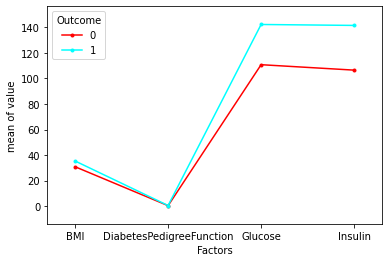

In [20]:
fig = interaction_plot(x=d_melt['Factors'], trace=d_melt['Outcome'], response=d_melt['value'])
plt.show()